<a href="https://colab.research.google.com/github/chebil/stat/blob/main/part2/ch04_applications.ipynb" target="_blank" rel="noopener noreferrer"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.4 Using the Weak Law of Large Numbers

The weak law and expected values are powerful tools for decision-making under uncertainty. Let's explore practical applications.

## 4.4.1 Should You Accept a Bet?

Suppose someone offers you a bet. Should you take it? The expected value tells you!

### Example: Simple Bet

A game costs $1 to play. You roll a die:
- Roll 6: Win $5
- Roll anything else: Win $0

Should you play?

Simple Bet Analysis:
Cost to play: $1
Expected winnings: $0.8333
Expected profit: $-0.1667

✗ Don't take the bet. Negative expected profit.


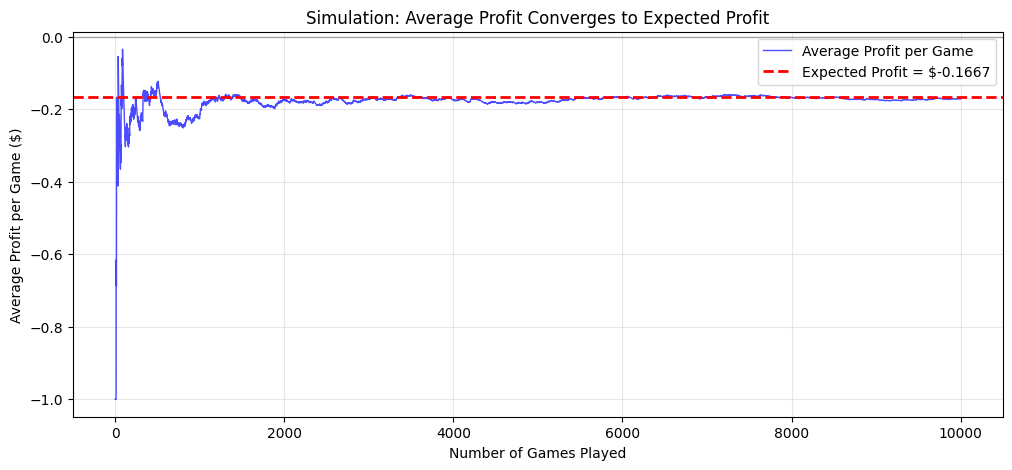


After 10000 games:
Average profit per game: $-0.1715
Total profit: $-1715.00


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Expected winnings
prob_win = 1/6
prob_lose = 5/6
winnings_if_win = 5
winnings_if_lose = 0
cost = 1

expected_winnings = prob_win * winnings_if_win + prob_lose * winnings_if_lose
expected_profit = expected_winnings - cost

print("Simple Bet Analysis:")
print(f"Cost to play: ${cost}")
print(f"Expected winnings: ${expected_winnings:.4f}")
print(f"Expected profit: ${expected_profit:.4f}")

if expected_profit > 0:
    print("\n✓ Take the bet! Positive expected profit.")
else:
    print("\n✗ Don't take the bet. Negative expected profit.")

# Simulate
np.random.seed(42)
num_games = 10000
total_profit = 0
running_profit = []

for i in range(num_games):
    roll = np.random.randint(1, 7)
    if roll == 6:
        profit = 5 - 1
    else:
        profit = -1
    total_profit += profit
    running_profit.append(total_profit / (i + 1))

# Plot
plt.figure(figsize=(12, 5))
plt.plot(running_profit, 'b-', linewidth=1, alpha=0.7, label='Average Profit per Game')
plt.axhline(expected_profit, color='r', linestyle='--', linewidth=2, 
            label=f'Expected Profit = ${expected_profit:.4f}')
plt.axhline(0, color='black', linestyle='-', linewidth=1, alpha=0.3)
plt.xlabel('Number of Games Played')
plt.ylabel('Average Profit per Game ($)')
plt.title('Simulation: Average Profit Converges to Expected Profit')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"\nAfter {num_games} games:")
print(f"Average profit per game: ${running_profit[-1]:.4f}")
print(f"Total profit: ${total_profit:.2f}")

In [2]:
# Lottery expected value
cost = 2
prizes = [1_000_000, 10_000, 100, 0]
probs = [1/10_000_000, 1/1_000_000, 1/10_000, 1 - (1/10_000_000 + 1/1_000_000 + 1/10_000)]

expected_winnings = sum(prize * prob for prize, prob in zip(prizes, probs))
expected_profit = expected_winnings - cost

print("\nLottery Analysis:")
print(f"Ticket cost: ${cost}")
print(f"Expected winnings: ${expected_winnings:.4f}")
print(f"Expected profit: ${expected_profit:.4f}")

if expected_profit < 0:
    print("\n✗ Don't buy! You'll lose ${:.4f} per ticket on average.".format(-expected_profit))

print("\nBreakdown:")
for prize, prob in zip(prizes[:3], probs[:3]):
    contribution = prize * prob
    print(f"  ${prize:,} prize: contributes ${contribution:.4f} to expected value")


Lottery Analysis:
Ticket cost: $2
Expected winnings: $0.1200
Expected profit: $-1.8800

✗ Don't buy! You'll lose $1.8800 per ticket on average.

Breakdown:
  $1,000,000 prize: contributes $0.1000 to expected value
  $10,000 prize: contributes $0.0100 to expected value
  $100 prize: contributes $0.0100 to expected value


## The Gambler's Fallacy

**Common Mistake**: "I've lost 5 times in a row, so I'm due to win!"

**Reality**: Each game is independent. Past losses don't affect future outcomes.

In [3]:
# Demonstrate independence
np.random.seed(42)

# Play 1000 games
results = np.random.choice([0, 1], size=1000, p=[0.6, 0.4])  # 40% win rate

# Find streaks of losses
streak_length = 5
losses_5_in_row = []
wins_after_5_losses = []

for i in range(len(results) - streak_length):
    if sum(results[i:i+streak_length]) == 0:  # 5 losses in a row
        losses_5_in_row.append(i)
        wins_after_5_losses.append(results[i+streak_length])

if wins_after_5_losses:
    win_rate_after_streak = np.mean(wins_after_5_losses)
    print("\nGambler's Fallacy Check:")
    print(f"Found {len(losses_5_in_row)} instances of 5 losses in a row")
    print(f"Win rate after 5-loss streak: {win_rate_after_streak:.3f}")
    print(f"Overall win rate: {np.mean(results):.3f}")
    print(f"Expected win rate: 0.400")
    print("\n→ Past losses don't predict future wins!")


Gambler's Fallacy Check:
Found 80 instances of 5 losses in a row
Win rate after 5-loss streak: 0.350
Overall win rate: 0.387
Expected win rate: 0.400

→ Past losses don't predict future wins!


## 4.4.2 Odds, Expectations and Bookmaking

Bookmakers set **odds** to ensure they make money regardless of the outcome.

### Understanding Odds

**Decimal odds**: If odds are 3.5, you get $3.50 for every $1 bet (including your stake).

**Fair odds**: Odds that give zero expected profit:
$$\text{Fair odds} = \frac{1}{P(\text{event})}$$

### Example: Sports Betting

In [4]:
# Two teams
team_a_prob = 0.6
team_b_prob = 0.4

# Fair odds
fair_odds_a = 1 / team_a_prob
fair_odds_b = 1 / team_b_prob

print("Fair Odds (zero expected profit):")
print(f"Team A wins: {fair_odds_a:.3f}")
print(f"Team B wins: {fair_odds_b:.3f}")

# Bookmaker adds margin
margin = 0.10  # 10% margin
book_odds_a = fair_odds_a / (1 + margin)
book_odds_b = fair_odds_b / (1 + margin)

print(f"\nBookmaker's Odds (with {margin*100}% margin):")
print(f"Team A wins: {book_odds_a:.3f}")
print(f"Team B wins: {book_odds_b:.3f}")

# Expected profit for bettor
bet_amount = 10
expected_return_a = team_a_prob * (bet_amount * book_odds_a) + (1 - team_a_prob) * 0
expected_profit_a = expected_return_a - bet_amount

print(f"\nBetting ${bet_amount} on Team A:")
print(f"Expected return: ${expected_return_a:.2f}")
print(f"Expected profit: ${expected_profit_a:.2f}")
print("\n→ Bookmaker's margin ensures they profit!")

Fair Odds (zero expected profit):
Team A wins: 1.667
Team B wins: 2.500

Bookmaker's Odds (with 10.0% margin):
Team A wins: 1.515
Team B wins: 2.273

Betting $10 on Team A:
Expected return: $9.09
Expected profit: $-0.91

→ Bookmaker's margin ensures they profit!


## 4.4.3 Ending a Game Early

Two players are competing for a prize. The game is interrupted. How should they split the prize?

**The Problem of Points** (solved by Pascal and Fermat):
- First to win $n$ rounds gets the prize
- Game stops when Player A has won $a$ rounds, Player B has won $b$ rounds
- How to split the prize fairly?

**Solution**: Based on probability of each player winning if the game continued.

In [5]:
from scipy.special import comb

def probability_player_a_wins(a, b, n, p=0.5):
    """
    Probability that Player A wins overall.
    a: rounds already won by A
    b: rounds already won by B
    n: total rounds needed to win
    p: probability A wins each round
    """
    rounds_needed_a = n - a
    rounds_needed_b = n - b
    max_rounds = rounds_needed_a + rounds_needed_b - 1
    
    # A wins if they win at least rounds_needed_a in the next max_rounds
    prob_a_wins = 0
    for k in range(rounds_needed_a, max_rounds + 1):
        prob_a_wins += comb(max_rounds, k) * (p**k) * ((1-p)**(max_rounds - k))
    
    return prob_a_wins

# Example
n = 10  # First to 10 wins
a = 7   # A has 7 wins
b = 5   # B has 5 wins
total_prize = 1000

prob_a = probability_player_a_wins(a, b, n)
prob_b = 1 - prob_a

fair_split_a = prob_a * total_prize
fair_split_b = prob_b * total_prize

print("Problem of Points:")
print(f"Player A: {a} wins (needs {n-a} more)")
print(f"Player B: {b} wins (needs {n-b} more)")
print(f"\nProbability A wins overall: {prob_a:.4f}")
print(f"Probability B wins overall: {prob_b:.4f}")
print(f"\nFair split of ${total_prize}:")
print(f"Player A gets: ${fair_split_a:.2f}")
print(f"Player B gets: ${fair_split_b:.2f}")

Problem of Points:
Player A: 7 wins (needs 3 more)
Player B: 5 wins (needs 5 more)

Probability A wins overall: 0.7734
Probability B wins overall: 0.2266

Fair split of $1000:
Player A gets: $773.44
Player B gets: $226.56


## 4.4.4 Making a Decision with Decision Trees

Decision trees help visualize choices and their expected outcomes.

### Example: Medical Treatment Decision

Medical Decision Analysis:

No Surgery: Utility = 70

Surgery:
  Success (90.0%): Utility = 95
  Complication (10.0%): Utility = 40
  Expected utility = 89.5

✓ Recommend surgery (expected utility 89.5 > 70)


/tmp/ipykernel_104709/3358698719.py:35: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(mpatches.Rectangle((1, 4.5), 0.5, 1, fill=True, color='lightblue', edgecolor='black'))
/tmp/ipykernel_104709/3358698719.py:45: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(mpatches.Circle((4, 7), 0.3, fill=True, color='lightyellow', edgecolor='black'))
/tmp/ipykernel_104709/3358698719.py:54: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(mpatches.Rectangle((7, 8.2), 1.5, 0.6, fill=True, color='lightgreen', edgecolor='black'))
/tmp/ipykernel_104709/3358698719.py:57: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(mpatches.Rectangle((7, 5.2), 1.5, 0.6, fill=True, color='lightcoral', edgecolor='black'))
/tmp/ipykernel_104709/3358698719.py:60: UserWarning:

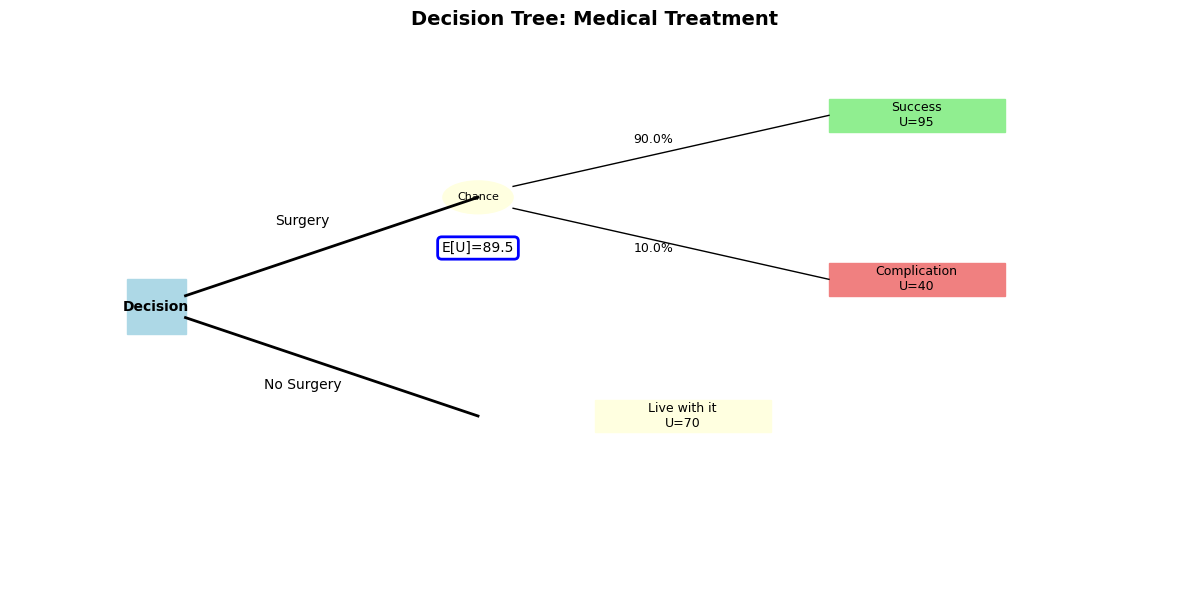

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Decision: Should patient get surgery?
# Without surgery: live with condition (utility = 70)
# With surgery: 90% success (utility = 95), 10% complications (utility = 40)

utility_no_surgery = 70
prob_success = 0.9
utility_success = 95
prob_complication = 0.1
utility_complication = 40

expected_utility_surgery = prob_success * utility_success + prob_complication * utility_complication

print("Medical Decision Analysis:")
print(f"\nNo Surgery: Utility = {utility_no_surgery}")
print(f"\nSurgery:")
print(f"  Success ({prob_success*100}%): Utility = {utility_success}")
print(f"  Complication ({prob_complication*100}%): Utility = {utility_complication}")
print(f"  Expected utility = {expected_utility_surgery}")

if expected_utility_surgery > utility_no_surgery:
    print(f"\n✓ Recommend surgery (expected utility {expected_utility_surgery} > {utility_no_surgery})")
else:
    print(f"\n✗ Don't recommend surgery (expected utility {expected_utility_surgery} ≤ {utility_no_surgery})")

# Visualize decision tree
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.axis('off')

# Decision node
ax.add_patch(mpatches.Rectangle((1, 4.5), 0.5, 1, fill=True, color='lightblue', edgecolor='black'))
ax.text(1.25, 5, 'Decision', ha='center', va='center', fontweight='bold')

# Branches
ax.plot([1.5, 4], [5.2, 7], 'k-', linewidth=2)
ax.plot([1.5, 4], [4.8, 3], 'k-', linewidth=2)
ax.text(2.5, 6.5, 'Surgery', ha='center', fontsize=10)
ax.text(2.5, 3.5, 'No Surgery', ha='center', fontsize=10)

# Surgery outcomes
ax.add_patch(mpatches.Circle((4, 7), 0.3, fill=True, color='lightyellow', edgecolor='black'))
ax.text(4, 7, 'Chance', ha='center', va='center', fontsize=8)

ax.plot([4.3, 7], [7.2, 8.5], 'k-', linewidth=1)
ax.plot([4.3, 7], [6.8, 5.5], 'k-', linewidth=1)
ax.text(5.5, 8, f'{prob_success*100}%', ha='center', fontsize=9)
ax.text(5.5, 6, f'{prob_complication*100}%', ha='center', fontsize=9)

# Outcomes
ax.add_patch(mpatches.Rectangle((7, 8.2), 1.5, 0.6, fill=True, color='lightgreen', edgecolor='black'))
ax.text(7.75, 8.5, f'Success\nU={utility_success}', ha='center', va='center', fontsize=9)

ax.add_patch(mpatches.Rectangle((7, 5.2), 1.5, 0.6, fill=True, color='lightcoral', edgecolor='black'))
ax.text(7.75, 5.5, f'Complication\nU={utility_complication}', ha='center', va='center', fontsize=9)

ax.add_patch(mpatches.Rectangle((5, 2.7), 1.5, 0.6, fill=True, color='lightyellow', edgecolor='black'))
ax.text(5.75, 3, f'Live with it\nU={utility_no_surgery}', ha='center', va='center', fontsize=9)

# Expected utilities
ax.text(4, 6, f'E[U]={expected_utility_surgery}', ha='center', fontsize=10, 
        bbox=dict(boxstyle='round', facecolor='white', edgecolor='blue', linewidth=2))

plt.title('Decision Tree: Medical Treatment', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

St. Petersburg Paradox:
Theoretical expected value: Infinite

Simulation (10000 games):
Average winnings: $15.04
Median winnings: $2.00
Maximum won: $16,384
95th percentile: $32

Winnings distribution:
  Won ≥ $2: 100.0%
  Won ≥ $4: 50.0%
  Won ≥ $8: 25.0%
  Won ≥ $16: 12.8%
  Won ≥ $32: 6.2%
  Won ≥ $64: 2.9%
  Won ≥ $128: 1.4%


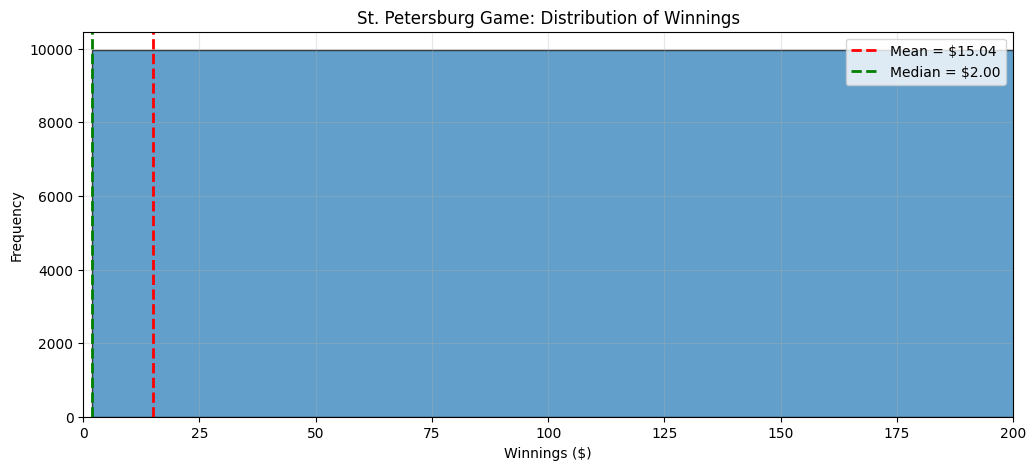


→ Despite infinite expected value, most people wouldn't pay much to play!
   This is because utility isn't linear in money.


In [7]:
# Simulate St. Petersburg game
np.random.seed(42)

def play_st_petersburg():
    n = 1
    while np.random.random() > 0.5:  # Tails
        n += 1
    return 2**n

num_games = 10000
winnings = [play_st_petersburg() for _ in range(num_games)]

print("St. Petersburg Paradox:")
print(f"Theoretical expected value: Infinite")
print(f"\nSimulation ({num_games} games):")
print(f"Average winnings: ${np.mean(winnings):.2f}")
print(f"Median winnings: ${np.median(winnings):.2f}")
print(f"Maximum won: ${np.max(winnings):,.0f}")
print(f"95th percentile: ${np.percentile(winnings, 95):.0f}")

print("\nWinnings distribution:")
for threshold in [2, 4, 8, 16, 32, 64, 128]:
    pct = np.mean(np.array(winnings) >= threshold) * 100
    print(f"  Won ≥ ${threshold}: {pct:.1f}%")

# Histogram
plt.figure(figsize=(12, 5))
plt.hist(winnings, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Winnings ($)')
plt.ylabel('Frequency')
plt.title('St. Petersburg Game: Distribution of Winnings')
plt.axvline(np.mean(winnings), color='r', linestyle='--', linewidth=2, 
            label=f'Mean = ${np.mean(winnings):.2f}')
plt.axvline(np.median(winnings), color='g', linestyle='--', linewidth=2, 
            label=f'Median = ${np.median(winnings):.2f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim([0, 200])
plt.show()

print("\n→ Despite infinite expected value, most people wouldn't pay much to play!")
print("   This is because utility isn't linear in money.")

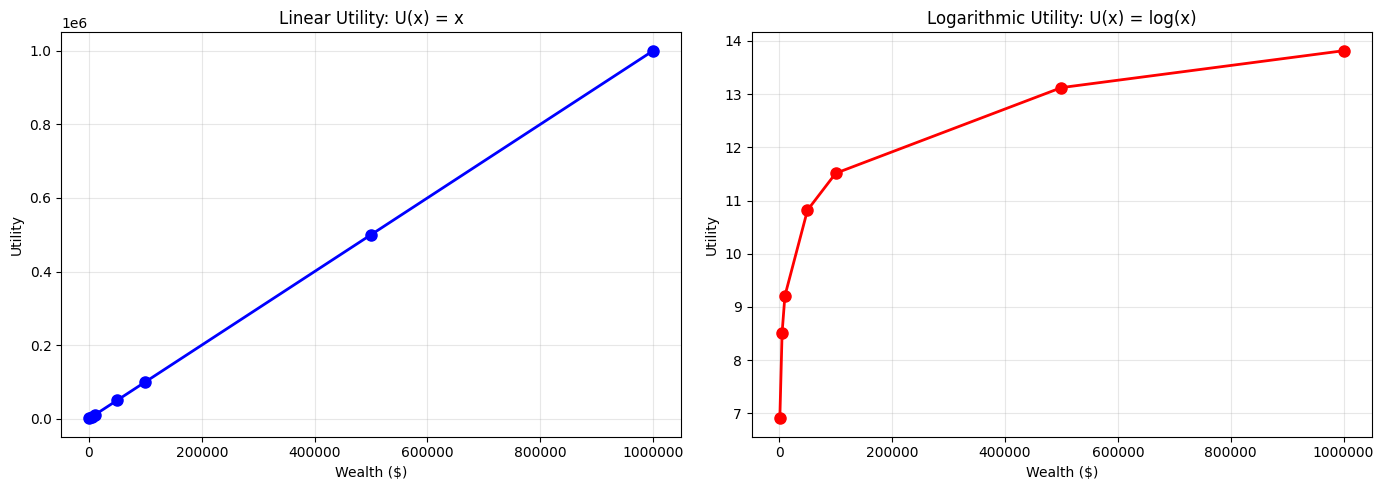


Marginal utility (value of next $100k):
At $10,000: Linear = 100,000, Log = 2.3979
At $100,000: Linear = 100,000, Log = 0.6931
At $1,000,000: Linear = 100,000, Log = 0.0953

→ Logarithmic utility shows diminishing marginal value!


In [8]:
# Compare linear vs logarithmic utility
wealth_levels = np.array([1000, 5000, 10000, 50000, 100000, 500000, 1000000])
linear_utility = wealth_levels
log_utility = np.log(wealth_levels)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Linear utility
ax1.plot(wealth_levels, linear_utility, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Wealth ($)')
ax1.set_ylabel('Utility')
ax1.set_title('Linear Utility: U(x) = x')
ax1.grid(True, alpha=0.3)
ax1.ticklabel_format(style='plain', axis='x')

# Log utility
ax2.plot(wealth_levels, log_utility, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Wealth ($)')
ax2.set_ylabel('Utility')
ax2.set_title('Logarithmic Utility: U(x) = log(x)')
ax2.grid(True, alpha=0.3)
ax2.ticklabel_format(style='plain', axis='x')

plt.tight_layout()
plt.show()

print("\nMarginal utility (value of next $100k):")
for w in [10000, 100000, 1000000]:
    linear_marginal = 100000
    log_marginal = np.log(w + 100000) - np.log(w)
    print(f"At ${w:,}: Linear = {linear_marginal:,}, Log = {log_marginal:.4f}")
print("\n→ Logarithmic utility shows diminishing marginal value!")


## Practice Problems

1. A game costs $5. You flip 3 coins and win $2 for each heads. Should you play?

2. Calculate fair odds for an event with probability 0.3. What odds would a bookmaker with 15% margin offer?

3. Two players play first-to-5. Score is 4-2. Game stops. How should a $500 prize be split?

4. You can invest $1000 with 60% chance of $1500 return, 40% chance of $500 return. What's the expected return? Should you invest?

## Key Lesson

{admonition} The Power of Expected Value
:class: tip
Expected value combined with the weak law of large numbers tells us:
- What to expect "on average"
- That averages converge to expectations
- How to make optimal decisions under uncertainty

This is the foundation of rational decision-making in uncertain environments!
```